In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [ ]:
df =pd.read_csv("/content/vista minable - solicitudes de consumo.csv" , header = 0 )

In [ ]:
df.nunique()

,0
Internal ID,119486
Class,6
Fecha y Hora,373617
Field,2
Old Value,9
New Value,9
Role,8
Sociedad Anónima,4
Ubicación Anónima,18
Nombre Anónimo,312


In [ ]:
df.shape

(505265, 12)

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


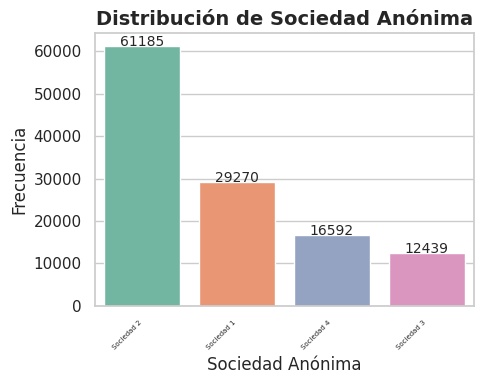

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


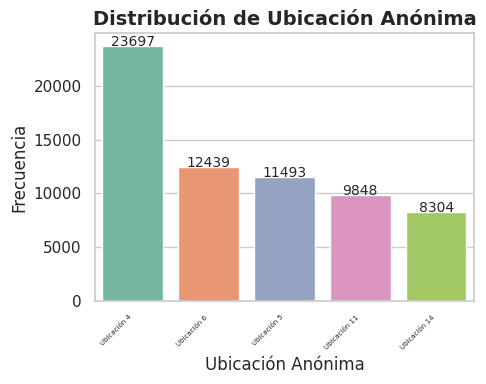

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


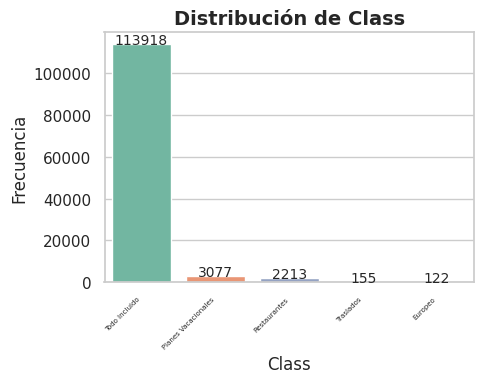

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_unique = df.drop_duplicates(subset= ['Internal ID'])

## NUMERO DE INTERACCIONES

# Set style for better aesthetics
sns.set(style="whitegrid")

# List of columns to plot
columns = ['Sociedad Anónima', 'Ubicación Anónima', 'Class']

# Assuming 'df_unique' and 'columns' are already defined
# Loop through each column and generate a count plot
for i in columns:
    # Get the top 5 most common categories in each column
    order = df_unique[i].value_counts().head().index

    # Create the count plot
    plt.figure(figsize=(5, 4))  # Adjust figure size
    ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=5)

    # Set plot titles and labels
    plt.title(f'Distribución de {i}', fontsize=14, fontweight='bold')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Add count labels inside the bars using a loop for all patches
    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Calculate the x-position for the label
            height + 3,  # Calculate the y-position for the label (adjust as needed)
            '{:1.0f}'.format(height),  # Format the label text (e.g., with 0 decimal places)
            ha="center",  # Horizontal alignment of the label
            fontsize=10,
        )

    # Show the plot with tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

In [ ]:
# Tipo "class" que se tiene en el proceso
class_hotel = df.groupby('Ubicación Anónima')['Class'].nunique().sort_values(ascending=False).reset_index()
class_hotel['Class'].value_counts()

,count
Class,
2,8
1,8
3,2


In [ ]:
freq_new_value = df['New Value'].value_counts().reset_index() #reset_index(): This is used to turn the result of value_counts() into a DataFrame where the Value is the index and Frequency is the column.
freq_new_value.columns = ['Nombre Proceso' , 'Frecuencia en NV']

freq_old_value = df['Old Value'].value_counts().reset_index()
freq_old_value.columns = ['Nombre Proceso' , 'Frecuencia en OV']

freq_table = pd.merge ( freq_old_value , freq_new_value , on = 'Nombre Proceso' , how = 'outer' ).fillna(0)
freq_table


,Nombre Proceso,Frecuencia en OV,Frecuencia en NV
0,Aprobación Pendiente,89815.0,90964.0
1,Aprobada,15681.0,123497.0
2,Cerrado por faltante,0.0,49770.0
3,Completada,8.0,68358.0
4,Creada,238972.0,0.0
5,Entrega Parcial,42509.0,42646.0
6,Parcialmente completado,1.0,3.0
7,Pendiente por Entregar,118200.0,119493.0
8,Pending Fulfillment,67.0,1.0
9,Rechazado,12.0,10533.0


In [ ]:
facturas_sociedad = df.groupby('Sociedad Anónima')['Internal ID'].nunique().sort_values(ascending=False).reset_index()
facturas_sociedad

,Sociedad Anónima,Internal ID
0,Sociedad 2,61185
1,Sociedad 1,29270
2,Sociedad 4,16592
3,Sociedad 3,12439


In [ ]:
##USUARIOS UNICOS QUE INTERVIENEN EN CADA FACTURACION
usuarios_factura = df.groupby('Internal ID')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_factura


,Internal ID,Nombre Anónimo
0,384414,5
1,155325,4
2,237561,4
3,331644,4
4,331646,4
...,...,...
119481,392091,1
119482,405066,1
119483,405111,1
119484,405106,1


In [ ]:
usuarios_factura.describe()

,Internal ID,Nombre Anónimo
count,119486.000000,119486.000000
mean,275412.612373,2.286720
std,75792.307751,0.595152
min,150053.000000,1.000000
25%,207544.000000,2.000000
50%,276668.500000,2.000000
75%,341443.500000,3.000000
max,405117.000000,5.000000


In [ ]:
usuarios_proceso = df.groupby('New Value')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_proceso

,New Value,Nombre Anónimo
0,Aprobada,259
1,Cerrado por faltante,228
2,Pendiente por Entregar,214
3,Aprobación Pendiente,201
4,Rechazado,189
5,Completada,74
6,Entrega Parcial,63
7,Parcialmente completado,2
8,Pending Fulfillment,1


In [ ]:
# 1. Average Timestamp by 'Document Number'
avg_timestamp_by_doc = df.groupby('Internal ID')['TimeStamp'].mean().reset_index()

# 2. Average Timestamp by 'New Value'
avg_timestamp_by_new_value = df.groupby('New Value')['TimeStamp'].mean().reset_index()

# Display the results
print("Average Timestamp by Internal ID:")
print(avg_timestamp_by_doc)

print("\nAverage Timestamp by New Value:")
print(avg_timestamp_by_new_value)

Average Timestamp by Internal ID:
        Internal ID    TimeStamp
0            150053  8046.108333
1            150054   685.850000
2            150055  1027.758333
3            150056   398.243333
4            150057   872.916667
...             ...          ...
119481       405111    19.450000
119482       405112   708.811111
119483       405113  1279.791667
119484       405114  1275.725000
119485       405117   694.461111

[119486 rows x 2 columns]

Average Timestamp by New Value:
                 New Value      TimeStamp
0     Aprobación Pendiente    1906.675973
1                 Aprobada    2079.540604
2     Cerrado por faltante      77.102117
3               Completada     577.195098
4          Entrega Parcial   18129.507606
5  Parcialmente completado     730.266667
6   Pendiente por Entregar    1773.367466
7      Pending Fulfillment     113.433333
8                Rechazado  118806.509931


In [ ]:
avg_timestamp_by_doc

,Internal ID,TimeStamp
0,150053,8046.108333
1,150054,685.850000
2,150055,1027.758333
3,150056,398.243333
4,150057,872.916667
...,...,...
119481,405111,19.450000
119482,405112,708.811111
119483,405113,1279.791667
119484,405114,1275.725000


In [ ]:
avg_timestamp_by_doc['TimeStamp'].mean()

np.float64(5329.635828319664)